In [1]:
import pandas as pd

# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Display the first few rows of the merged data
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [2]:
# Aggregate transaction data to get customer profiles
customer_profiles = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).reset_index()

customer_profiles.columns = ['CustomerID', 'TotalSpent', 'TotalQuantity', 'TransactionCount']

# Merge with customer data
customer_profiles = pd.merge(customer_profiles, customers, on='CustomerID')

# Convert categorical variables to numerical
customer_profiles = pd.get_dummies(customer_profiles, columns=['Region'])

# Display the first few rows of the customer profiles
print(customer_profiles.head())

  CustomerID  TotalSpent  TotalQuantity  TransactionCount        CustomerName  \
0      C0001     3354.52             12                 5    Lawrence Carroll   
1      C0002     1862.74             10                 4      Elizabeth Lutz   
2      C0003     2725.38             14                 4      Michael Rivera   
3      C0004     5354.88             23                 8  Kathleen Rodriguez   
4      C0005     2034.24              7                 3         Laura Weber   

   SignupDate  Region_Asia  Region_Europe  Region_North America  \
0  2022-07-10        False          False                 False   
1  2022-02-13         True          False                 False   
2  2024-03-07        False          False                 False   
3  2022-10-09        False          False                 False   
4  2022-08-15         True          False                 False   

   Region_South America  
0                  True  
1                 False  
2                  True  
3     

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score

# Standardize the features
scaler = StandardScaler()
customer_features = scaler.fit_transform(customer_profiles.drop(columns=['CustomerID', 'CustomerName', 'SignupDate']))

# Choose the number of clusters
num_clusters = 5

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_profiles['Cluster'] = kmeans.fit_predict(customer_features)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features, customer_profiles['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.8747963240718416


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


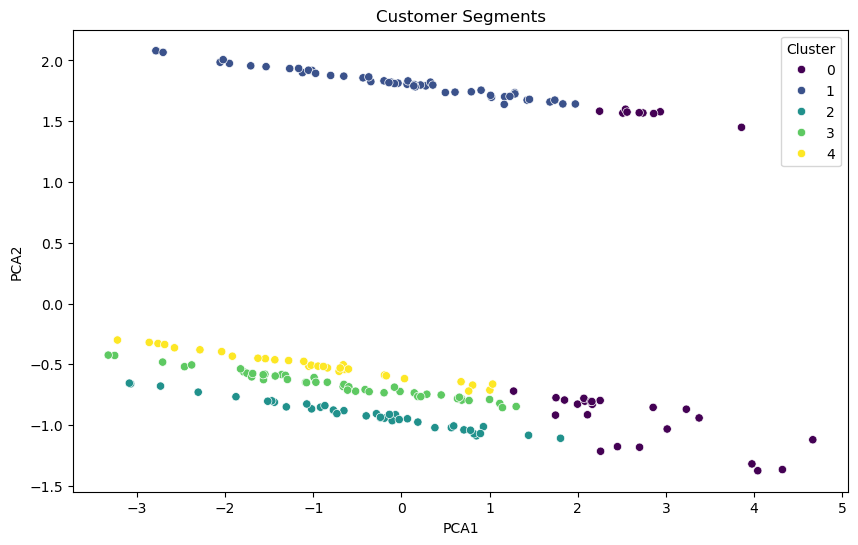

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
customer_features_pca = pca.fit_transform(customer_features)

# Add PCA components to the customer profiles
customer_profiles['PCA1'] = customer_features_pca[:, 0]
customer_profiles['PCA2'] = customer_features_pca[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profiles, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()